In [1]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image, ImageFilter
import os
from tqdm import tqdm
import seaborn as sns
sns.set_theme(palette=sns.color_palette('Set2'))

In [2]:
model = load_model('models_rotated_clustered//2022-12-18--15-22_best')

In [3]:
img_size = (92,70)
no_clusters = 2
no_images = len(os.listdir('pictures_rotated'))
pred_dict = {0:'paper', 1:'rock', 2:'scissors'}

100%|██████████| 42/42 [00:07<00:00,  5.82it/s]


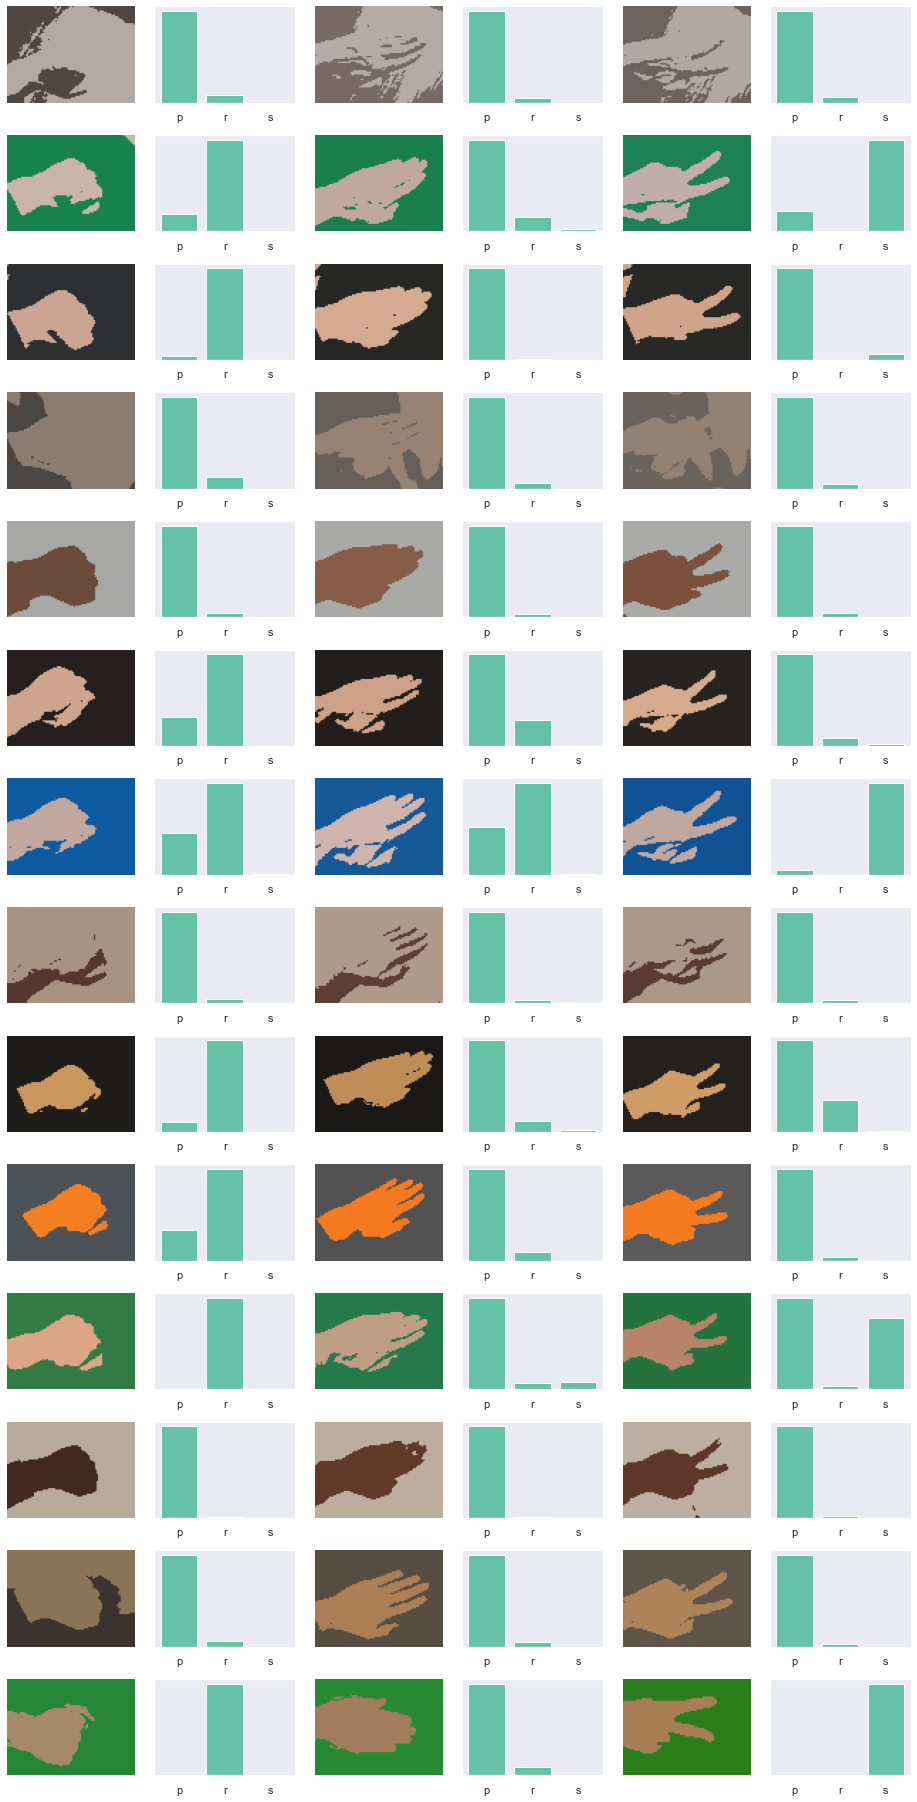

In [4]:
fig, axList = plt.subplots(nrows=no_images//3, ncols=6)
axList = axList.flatten()
fig.set_size_inches(13,no_images*.6)

for i in tqdm(range(no_images)):
    
    # load
    try:
        img = Image.open(f'pictures_rotated/{i+1}.jpg')
    except:
        img = Image.open(f'pictures_rotated/{i+1}.png')
    
    # resize
    img_resized = img.resize(img_size)
    
    # cast to array
    img_array = np.array(img_resized)
    
    # flatten for clustering
    img_flat = img_array.reshape(-1,3)
    
    # clustering
    kmeans = KMeans(n_clusters=no_clusters, random_state=0).fit(img_flat)
    
    # generate clustered image
    for j in np.unique(kmeans.labels_):
        img_flat[kmeans.labels_==j,:] = kmeans.cluster_centers_[j]
    img_k = img_flat.reshape(img_array.shape)
    img_k = Image.fromarray(img_k)
    
    # crop image to remove edges
    img_k = img_k.crop((1,1,img_size[0]-1,img_size[1]-1))
    
    # predict
    img_k_p = np.array(img_k)
    img_k_p = img_k_p.reshape(1, img_size[1]-2, img_size[0]-2, 3)
    img_k_p = img_k_p/255
    pred = model.predict(img_k_p)
    label_no = np.argmax(pred)
    label = pred_dict[label_no]
    
    # plot row of images
    ax = axList[i*2]
    ax.imshow(img_k)
    ax.axis('off')
    
    ax = axList[i*2+1]
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(['p','r','s'])
    ax.set_yticks([])
    ax.grid(False)
    ax.bar(range(3),pred.reshape(3))

plt.tight_layout()
plt.savefig('predicting_clustered_images.png')